# Corso di Probabilità e Statistica - Visualizzazione delle distribuzioni

In questo capitolo introduciamo alcuni metodi per visualizzare la distribuzione di un set di dati 


In [13]:
import numpy as np
import matplotlib.pyplot as plt


import scipy.stats as stats # Statistica
import seaborn as sns # Grafica avanzata

In [14]:
# Generare N numeri random Gaussiani
N=1000
x = np.random.randn(N)

In [15]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 12})

**Scatter plot**

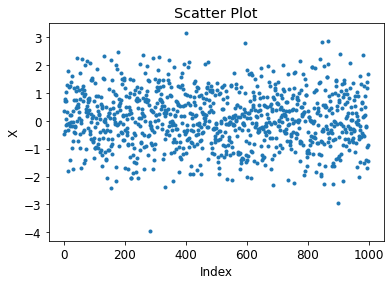

In [4]:
plt.plot(x,'.')
plt.title('Scatter Plot')
plt.xlabel('Index')
plt.ylabel('X')
plt.draw()

**Istogramma**

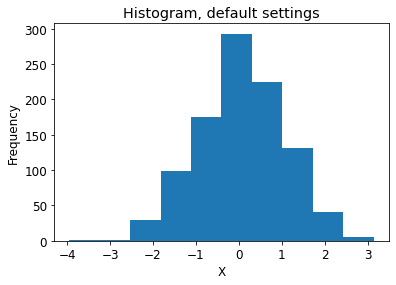

In [6]:
plt.hist(x)
plt.xlabel('X')
plt.ylabel('Frequency')
plt.title('Histogram, default settings')

plt.show()

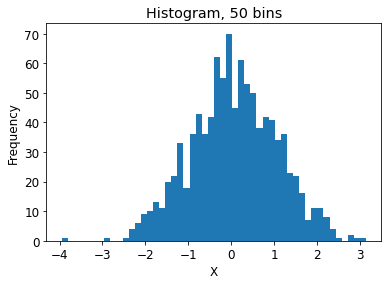

In [7]:
# cambiare il numero di bins
plt.hist(x,bins=50)
plt.xlabel('X')
plt.ylabel('Frequency')
plt.title('Histogram, 50 bins')

plt.show()

**Esercizio**

Alcuni varianti da provare (una alla volta o combinate). 
Per maggiori istruzioni vedi:
https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html

range: tuple or None, default: None

density: bool, default: False

cumulative: bool or -1, default: False

histtype: {'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'

log: bool, default: False

color: color or array-like of colors or None, default: None

*esempio plt.hist(x,bins=50, log=True, color="red") etc*

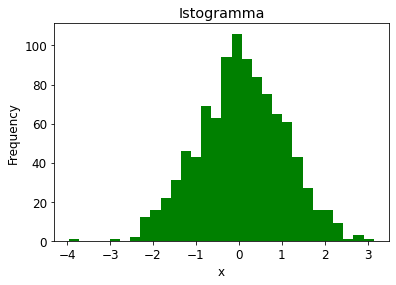

In [11]:
plt.hist(x, bins=30, log=False, color='green')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Istogramma')

plt.show()

**KDE (kernel density estimation)**

vedi: https://seaborn.pydata.org/generated/seaborn.kdeplot.html

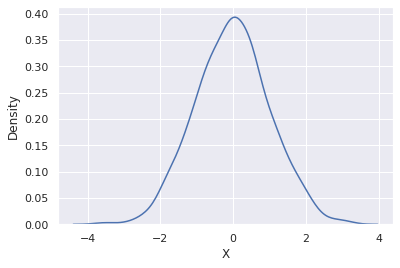

In [24]:
sns.set_theme() #mi da lo sfondo super bello

sns.kdeplot(x, legend = True) 
#in pratica kdeplot mi da un grafico continuo della distribuzione di probabilità del kernel di evoluzione statistica
#in questo caso il kernel è una distribuzione gaussiana e quindi il plot del kernel è una distribuzione gaussiana con gli stessi parametri della gaussiana originale

plt.xlabel('X')
plt.ylabel('Density')
plt.show()

**Istogramma + KDE : distplot**

Vedi: https://seaborn.pydata.org/generated/seaborn.distplot.html

/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


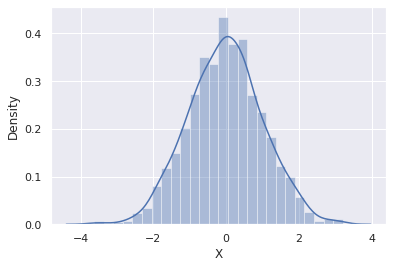

In [45]:
#distplot fa il plot del kernel e della distribuzione
sns.distplot(x)

plt.xlabel('X')
plt.ylabel('Density')
plt.show()

**Distribuzione cumulata** (con bins)

con scipy.stats

La distribuzione cumulata può essere importante, in sostanza mostro quanti valori ho trovato fino ad un certo valore di x.

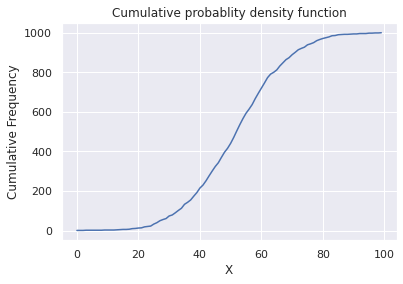

In [31]:
numbins = 100
#numero di bins in cui scelgo di distribuire i dati

cdf = stats.cumfreq(x,numbins)
#cumulative distribution function 
#cumfreq è una funzione della libreria statistics, 
#prende come argomenti un array di dati e un numero di bins fino al quale calcolare la cumulativa

plt.plot(cdf[0])
plt.xlabel('X')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative probablity density function')
plt.show()

Alternativa: matplotlib

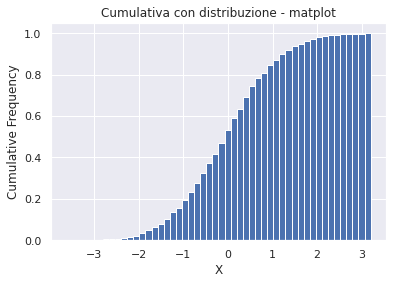

In [34]:
plt.hist(x,bins=50,cumulative=True,density=True)
#in pratica faccio un istogramma a 50 bins, i dati da distribuire nell'istogramma sono quelli contenuti in x
#sto chidendo di fare la cumulativa e di rappresentare 
plt.xlabel('X')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulativa con distribuzione - matplot')
plt.show()

Alternativa: seaborn

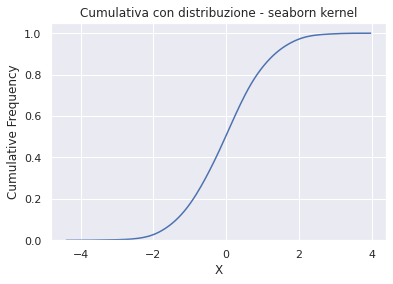

In [35]:
sns.kdeplot(x , cumulative=True)
#utilizzo un plot del kernel di seaborn però in pratica rappresento la cumulativa

plt.xlabel('X')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulativa con distribuzione - seaborn kernel')
plt.show()

**Distribuzione cumulata** (senza bins)

Possiamo ottenere la distribuzione cumulata in modo indipendente dai bin semplicemente ordinando i numeri random e plottandoli in funzione del rank /N

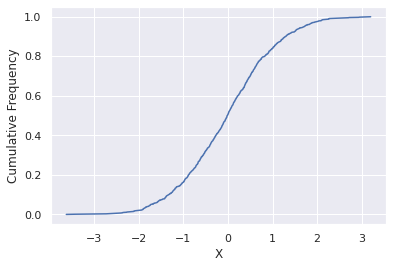

In [41]:
idx = np.zeros(len(y))
y=np.sort(x) 
#sort è una funzione di numpy che mi ordina i numeri (in questo caso numeri estratti casualmente)

for i in range(len(y)):
    idx[i] = i/len(y)

plt.xlabel('X')
plt.ylabel('Cumulative Frequency')
plt.plot(y,idx)
plt.show()

Per precisione usiamo degli steps (più corretto per pochi dati)

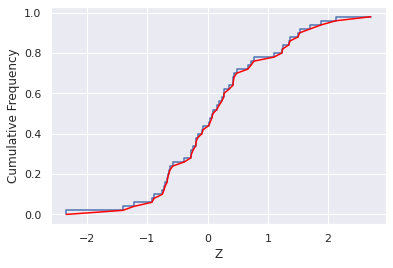

In [44]:
z=np.random.randn(50) #genero 50 numeri distribuiti secondo una gaussiana
y=np.sort(z) #ordino i numeri
idx = np.zeros(len(y))

for i in range(len(y)):
    idx[i] = i/len(y)
    
plt.xlabel('Z')
plt.ylabel('Cumulative Frequency')
plt.step(y,idx, label="Steps")
plt.plot(y,idx, color="red" , label="Line")
plt.show()

#è comunque un po' bruttina